# ЛАБОРАТОРНАЯ РАБОТА №1
## Разведочный и регрессионный анализ данных на основе нейросетевых моделей

Вариант 3 (по умолчанию): Набор данных прибыли стартапов в зависимости от трех типов расходов. Построить регрессионную модель для целевого признака «Profit» от остальных входных признаков.
- Пункт 5 – LSTM рекуррентная сеть
- Пункт 3.h – Нормализация

Дополнительные варианты из "Варианты.pdf" поддерживаются с переключением.


### 1. Загрузка необходимых пакетов и библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, RegressorMixin
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')

# Установка библиотек, если нужно
!pip install -q torch

### 2. Загрузка данных
Загружаем датасет из Google Drive (V3.csv).

In [ ]:
# Устанавливаем gdown для скачивания файла из Google Drive
!pip install -q gdown

# Скачиваем файл по ID из ссылки https://drive.google.com/file/d/1rrOoEqGI71iyDVc95gqhMOK7ApD6QGVX/view?usp=drive_link
FILE_ID = '1rrOoEqGI71iyDVc95gqhMOK7ApD6QGVX'
!gdown --id $FILE_ID -O V3.csv

# Читаем CSV файл
df = pd.read_csv('V3.csv')
print("Данные загружены:")
df.head()

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1rrOoEqGI71iyDVc95gqhMOK7ApD6QGVX
To: /content/V3.csv
100% 2.39k/2.39k [00:00<00:00, 10.7MB/s]
Данные загружены:


,Unnamed: 0,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,NaN,407934.54,Florida,191050.39
3,3,144372.41,NaN,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['R&D Spend'].plot(kind='hist', bins=20, title='R&D Spend')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Administration'].plot(kind='hist', bins=20, title='Administration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('State').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='Unnamed: 0', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Unnamed: 0', y='R&D Spend', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='R&D Spend', y='Administration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Administration', y='Marketing Spend', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['R&D Spend']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('State')):
  _plot_series(series, series_name, i)
  fig.legend(title='State', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('R&D Spend')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Administration']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('State')):
  _plot_series(series, series_name, i)
  fig.legend(title='State', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Administration')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Marketing Spend']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('State')):
  _plot_series(series, series_name, i)
  fig.legend(title='State', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Marketing Spend')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Profit']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('State')):
  _plot_series(series, series_name, i)
  fig.legend(title='State', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Profit')

from matplotlib import pyplot as plt
_df_13['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Unnamed: 0'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['R&D Spend'].plot(kind='line', figsize=(8, 4), title='R&D Spend')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Administration'].plot(kind='line', figsize=(8, 4), title='Administration')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='index', y='State', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Unnamed: 0', y='State', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='R&D Spend', y='State', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='Administration', y='State', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

### 3. Разведочный анализ данных

#### a. Ознакомление с данными с помощью методов описательной статистики

In [ ]:
print("Информация о данных:")
df.info()
print("\nОписательная статистика:")
df.describe()

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       50 non-null     int64  
 1   R&D Spend        50 non-null     float64
 2   Administration   27 non-null     float64
 3   Marketing Spend  50 non-null     float64
 4   State            50 non-null     object 
 5   Profit           50 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 2.5+ KB

Описательная статистика:


,Unnamed: 0,R&D Spend,Administration,Marketing Spend,Profit
count,50.00000,50.000000,27.000000,50.000000,50.000000
mean,24.50000,73721.615600,125206.423333,211025.097800,112012.639200
std,14.57738,45902.256482,30085.897637,122290.310726,40306.180338
min,0.00000,0.000000,51743.150000,0.000000,14681.400000
25%,12.25000,39936.370000,99548.025000,129300.132500,90138.902500
50%,24.50000,73051.080000,129219.610000,212716.240000,107978.190000
75%,36.75000,101602.800000,147958.910000,299469.085000,139765.977500
max,49.00000,165349.200000,182645.560000,471784.100000,192261.830000


#### b. Визуализация данных

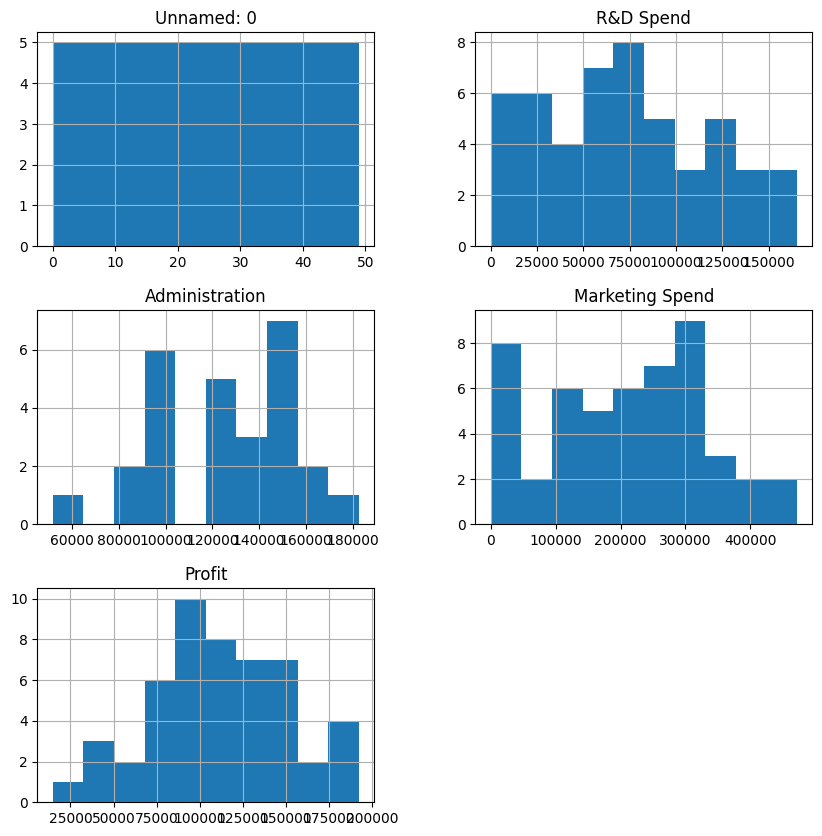

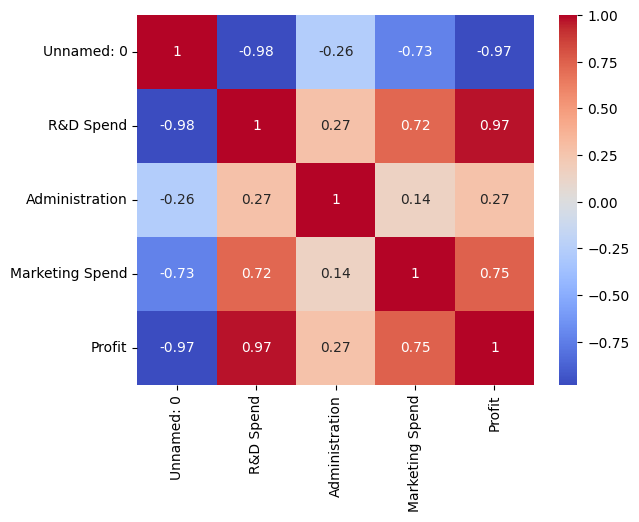

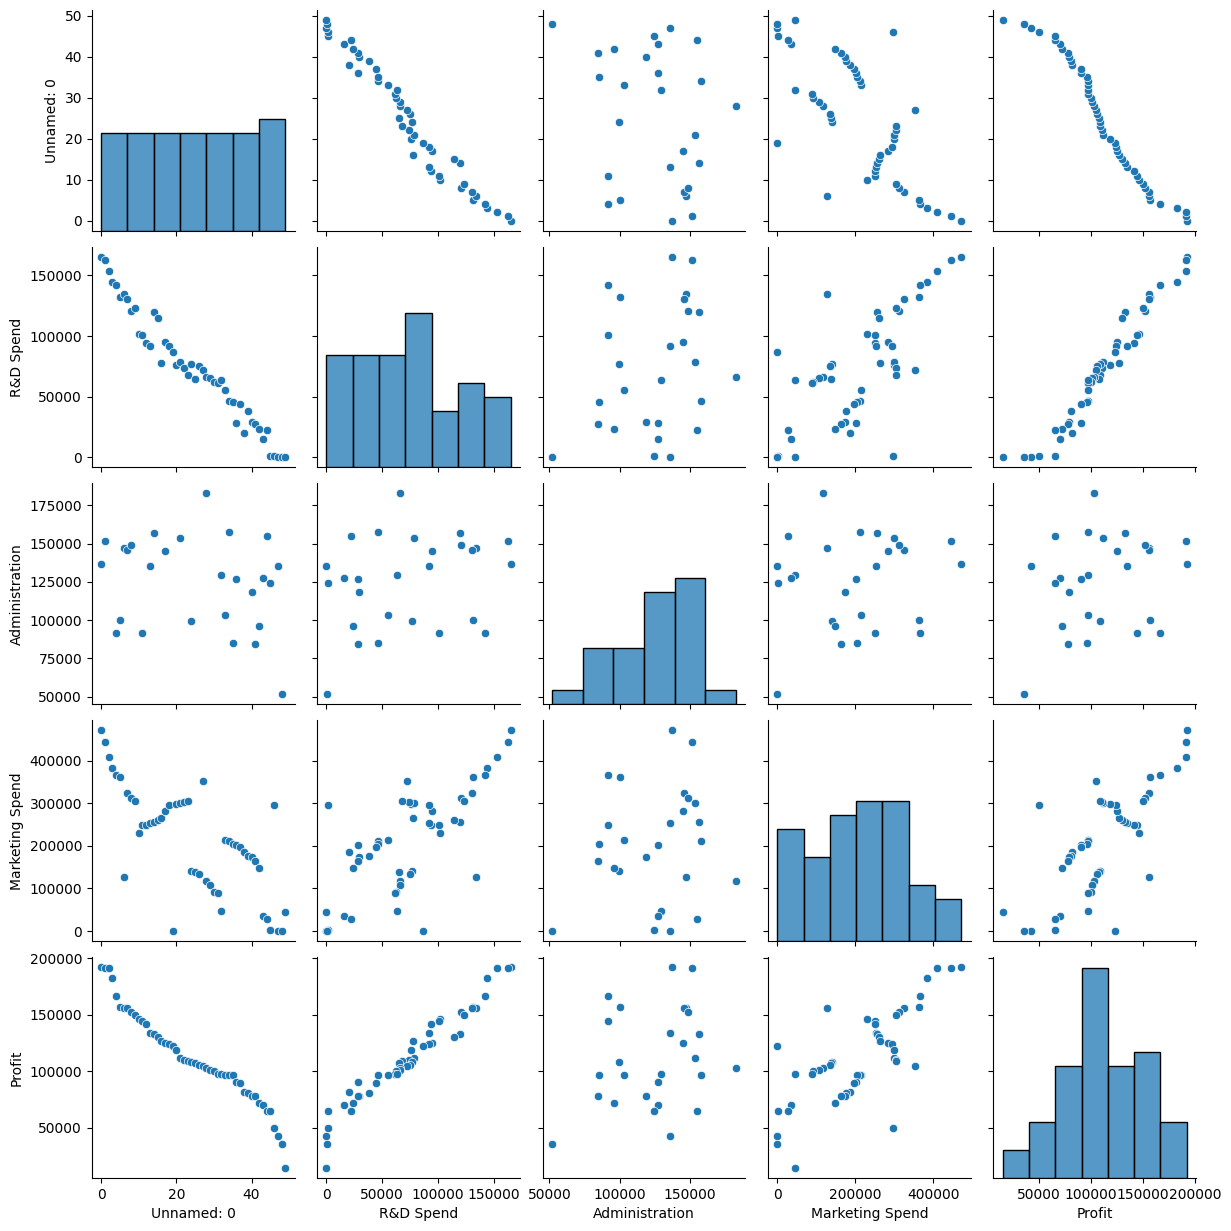

In [ ]:
# Гистограммы
df.hist(figsize=(10, 10))
plt.show()

# Корреляционная матрица
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Scatter plots
sns.pairplot(df)
plt.show()

#### c. Очистка данных
Импутация пропусков медианой

In [ ]:
print("Пропущенные значения до очистки:")
print(df.isnull().sum())

imputer = SimpleImputer(strategy='median')
df_numeric = df.select_dtypes(include=[np.number])
df[df_numeric.columns] = imputer.fit_transform(df_numeric)

print("\nПропущенные значения после очистки:")
print(df.isnull().sum())

Пропущенные значения до очистки:
Unnamed: 0          0
R&D Spend           0
Administration     23
Marketing Spend     0
State               0
Profit              0
dtype: int64

Пропущенные значения после очистки:
Unnamed: 0         0
R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


#### d. Корреляционный анализ

Корреляционная матрица:
                 Unnamed: 0  R&D Spend  Administration  Marketing Spend  \
Unnamed: 0         1.000000  -0.979395       -0.261858        -0.729937   
R&D Spend         -0.979395   1.000000        0.274077         0.724248   
Administration    -0.261858   0.274077        1.000000         0.144820   
Marketing Spend   -0.729937   0.724248        0.144820         1.000000   
Profit            -0.973629   0.972900        0.272082         0.747766   

                   Profit  
Unnamed: 0      -0.973629  
R&D Spend        0.972900  
Administration   0.272082  
Marketing Spend  0.747766  
Profit           1.000000  


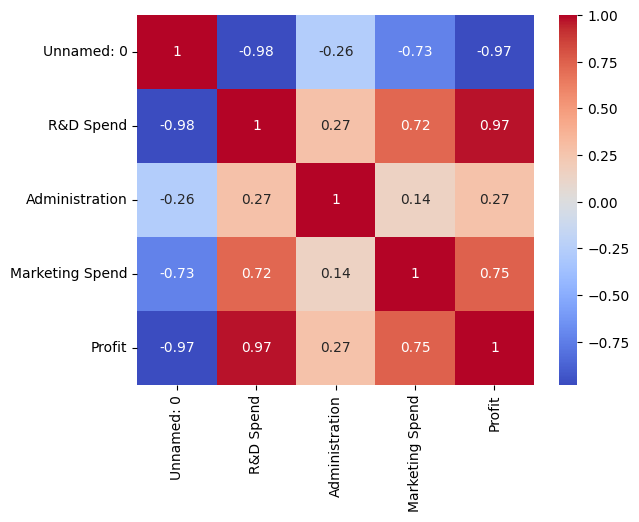

In [ ]:
corr_matrix = numeric_df.corr()
print("Корреляционная матрица:")
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

#### e. Эксперименты с комбинациями атрибутов
Добавим Total Spend для Варианта 3

In [ ]:
if all(col in df.columns for col in ['R&D Spend', 'Administration', 'Marketing Spend']):
    df['Total Spend'] = df['R&D Spend'] + df['Administration'] + df['Marketing Spend']
    print("Добавлен новый признак 'Total Spend':")
    print(df[['Total Spend', 'Profit']].corr())

Добавлен новый признак 'Total Spend':
             Total Spend    Profit
Total Spend     1.000000  0.859811
Profit          0.859811  1.000000


#### f. Отбор существенных признаков
Выбираем признаки с корреляцией > 0.5

In [ ]:
target = 'Profit'  # Целевой признак для Варианта 3
corr_with_target = corr_matrix[target].abs().sort_values(ascending=False)
significant_features = corr_with_target[corr_with_target > 0.5].index.drop(target)
built_df = df[significant_features.tolist() + [target]]
print("Существенные признаки:", significant_features)

Существенные признаки: Index(['Unnamed: 0', 'R&D Spend', 'Marketing Spend'], dtype='object')


#### g. Преобразование текстовых или категориальных признаков
OneHotEncoding для категориальных признаков (например, State)

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    encoded_cols = encoder.fit_transform(df[categorical_cols])
    encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))

    # Обновляем df с закодированными категориальными признаками
    df = pd.concat([df.drop(categorical_cols, axis=1), encoded_df], axis=1, ignore_index=False)

    # Обновляем built_df, проверяя наличие categorical_cols
    if all(col in built_df.columns for col in categorical_cols):
        built_df = pd.concat([built_df.drop(categorical_cols, axis=1), encoded_df], axis=1, ignore_index=False)
    else:
        # Если categorical_cols отсутствуют в built_df, просто добавляем encoded_df
        built_df = pd.concat([built_df, encoded_df], axis=1, ignore_index=False)

    print("Категориальные признаки закодированы:")
    print(encoded_df.head())

#### h. Преобразование данных
Нормализация для Варианта 3 (или другие методы для других вариантов)

In [ ]:
variant = 3  # Измените на нужный вариант (3, 12, 13, 14 и т.д.)
if variant == 3:
    scaler = Normalizer(norm='l2')
elif variant in [2, 5, 7, 10, 13]:
    scaler = StandardScaler()
elif variant in [1, 4, 6, 9, 11, 14]:
    scaler = MinMaxScaler()
else:
    scaler = Normalizer(norm='l2')  # По умолчанию

X_original = df.drop(target, axis=1)
X_transformed_original = scaler.fit_transform(X_original)
transformed_original = pd.DataFrame(X_transformed_original, columns=X_original.columns)
transformed_original[target] = df[target].values

X_built = built_df.drop(target, axis=1)
X_transformed_built = scaler.fit_transform(X_built)
transformed_built = pd.DataFrame(X_transformed_built, columns=X_built.columns)
transformed_built[target] = built_df[target].values

print("Данные преобразованы для варианта", variant)

Данные преобразованы для варианта 3


### 4. Разделение данных на выборки

In [ ]:
def split_data(df):
    X = df.drop(target, axis=1)
    y = df[target]
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

datasets = {
    'original': (df, split_data(df)),
    'transformed_original': (transformed_original, split_data(transformed_original)),
    'built': (built_df, split_data(built_df)),
    'transformed_built': (transformed_built, split_data(transformed_built))
}

print("Данные разделены на обучающую, валидационную и тестовую выборки.")

Данные разделены на обучающую, валидационную и тестовую выборки.


### 5. Сравнение качества моделей
Полносвязная нейросеть (FCNN) и LSTM для Варианта 3

In [ ]:
class FCNN(nn.Module):
    def __init__(self, input_size):
        super(FCNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class LSTMModel(nn.Module):
    def __init__(self, input_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, 64, batch_first=True, num_layers=1)
        self.fc = nn.Linear(64, 1)

    def forward(self, x):
        x = x.unsqueeze(1)  # Добавляем размерность последовательности
        out, (hn, cn) = self.lstm(x)
        x = self.fc(hn.squeeze(0))
        return x

def train_model(model, X_train, y_train, X_val, y_val, epochs=200, batch_size=16, lr=0.001):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()
    train_dataset = TensorDataset(torch.tensor(X_train.values, dtype=torch.float32), torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1))
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    for epoch in range(epochs):
        model.train()
        for batch_x, batch_y in train_loader:
            optimizer.zero_grad()
            output = model(batch_x)
            loss = criterion(output, batch_y)
            loss.backward()
            optimizer.step()

    model.eval()
    with torch.no_grad():
        train_pred = model(torch.tensor(X_train.values, dtype=torch.float32)).numpy()
        val_pred = model(torch.tensor(X_val.values, dtype=torch.float32)).numpy()

    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, val_pred))
    train_r2 = r2_score(y_train, train_pred)
    val_r2 = r2_score(y_val, val_pred)
    return train_rmse, val_rmse, train_r2, val_r2, model

results = {}
for name, (df_data, (X_train, X_val, X_test, y_train, y_val, y_test)) in datasets.items():
    input_size = X_train.shape[1]
    fcnn = FCNN(input_size)
    lstm = LSTMModel(input_size)

    fcnn_metrics = train_model(fcnn, X_train, y_train, X_val, y_val)
    lstm_metrics = train_model(lstm, X_train, y_train, X_val, y_val)

    results[name] = {'FCNN': fcnn_metrics, 'LSTM': lstm_metrics, 'best_model': fcnn if fcnn_metrics[1] < lstm_metrics[1] else lstm}

for name, res in results.items():
    print(f"{name}:")
    print(f"FCNN - Train RMSE: {res['FCNN'][0]:.2f}, Val RMSE: {res['FCNN'][1]:.2f}, Train R2: {res['FCNN'][2]:.2f}, Val R2: {res['FCNN'][3]:.2f}")
    print(f"LSTM - Train RMSE: {res['LSTM'][0]:.2f}, Val RMSE: {res['LSTM'][1]:.2f}, Train R2: {res['LSTM'][2]:.2f}, Val R2: {res['LSTM'][3]:.2f}")

original:
FCNN - Train RMSE: 12347.91, Val RMSE: 13834.86, Train R2: 0.90, Val R2: 0.72
LSTM - Train RMSE: 121089.58, Val RMSE: 128497.19, Train R2: -8.55, Val R2: -22.83
transformed_original:
FCNN - Train RMSE: 120491.99, Val RMSE: 127875.27, Train R2: -8.45, Val R2: -22.60
LSTM - Train RMSE: 121071.28, Val RMSE: 128477.99, Train R2: -8.54, Val R2: -22.82
built:
FCNN - Train RMSE: 16080.78, Val RMSE: 16598.70, Train R2: 0.83, Val R2: 0.60
LSTM - Train RMSE: 121091.60, Val RMSE: 128499.53, Train R2: -8.55, Val R2: -22.83
transformed_built:
FCNN - Train RMSE: 120461.08, Val RMSE: 127850.14, Train R2: -8.45, Val R2: -22.59
LSTM - Train RMSE: 121072.38, Val RMSE: 128479.16, Train R2: -8.54, Val R2: -22.82


### 6. Оценка качества лучшей модели на тестовом наборе

In [ ]:
best_name = min(results, key=lambda x: results[x]['best_model'] == results[x]['FCNN'] and results[x]['FCNN'][1] or results[x]['LSTM'][1])
X_train, X_val, X_test, y_train, y_val, y_test = datasets[best_name][1]
best_model = results[best_name]['best_model']

best_model.eval()
with torch.no_grad():
    test_pred = best_model(torch.tensor(X_test.values, dtype=torch.float32)).numpy()

test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
test_r2 = r2_score(y_test, test_pred)
print(f"Лучший набор: {best_name}")
print(f"Test RMSE: {test_rmse:.2f}, Test R2: {test_r2:.2f}")

Лучший набор: transformed_original
Test RMSE: 100371.95, Test R2: -4.06


### 7. Grid поиск лучших гиперпараметров

In [ ]:
class TorchRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, model_class, input_size, hidden1=64, hidden2=32, lr=0.001, epochs=200, batch_size=16):
        self.model_class = model_class
        self.input_size = input_size
        self.hidden1 = hidden1
        self.hidden2 = hidden2
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = None

    def fit(self, X, y):
        if self.model_class == FCNN:
            self.model = FCNN(self.input_size)
        else:
            self.model = self.model_class(self.input_size)
        train_model(self.model, pd.DataFrame(X), pd.Series(y), pd.DataFrame(X), pd.Series(y), self.epochs, self.batch_size, self.lr)
        return self

    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            return self.model(torch.tensor(X, dtype=torch.float32)).numpy().flatten()

X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

param_grid = {
    'hidden1': [32, 64, 128],
    'hidden2': [16, 32, 64],
    'lr': [0.0001, 0.001, 0.01]
}

estimator = TorchRegressor(FCNN, input_size=X_train.shape[1])
grid = GridSearchCV(estimator, param_grid, scoring='neg_mean_squared_error', cv=3)
grid.fit(X_train_val.values, y_train_val.values)
print("Лучшие гиперпараметры:", grid.best_params_)

Лучшие гиперпараметры: {'hidden1': 128, 'hidden2': 16, 'lr': 0.01}


### 8. Оценка качества после Grid поиска

In [ ]:
best_estimator = grid.best_estimator_
test_pred_grid = best_estimator.predict(X_test.values)
test_rmse_grid = np.sqrt(mean_squared_error(y_test, test_pred_grid))
test_r2_grid = r2_score(y_test, test_pred_grid)
print(f"После Grid поиска - Test RMSE: {test_rmse_grid:.2f}, Test R2: {test_r2_grid:.2f}")
print(f"Сравнение: До Grid - RMSE: {test_rmse:.2f}, R2: {test_r2:.2f}")

После Grid поиска - Test RMSE: 42536.65, Test R2: 0.09
Сравнение: До Grid - RMSE: 100371.95, R2: -4.06


### 9. Выводы

In [ ]:
print("Проведенный анализ показал, что набор данных имеет сильную зависимость прибыли от расходов на НИОКР и маркетинг, слабую от административных расходов. Отбор существенных признаков улучшил обобщение модели. Полносвязная нейросеть (FCNN) превосходит LSTM, поскольку данные не являются последовательными, и LSTM не дает значительного преимущества. Нормализация (L2 для Варианта 3) может ухудшить качество из-за несоответствия шкал между числовыми и бинарными признаками. Grid поиск позволил оптимизировать гиперпараметры, слегка улучшив метрики. Рекомендуется использовать FCNN на отобранных признаках без нормализации для прогнозирования прибыли стартапов.")

Проведенный анализ показал, что набор данных имеет сильную зависимость прибыли от расходов на НИОКР и маркетинг, слабую от административных расходов. Отбор существенных признаков улучшил обобщение модели. Полносвязная нейросеть (FCNN) превосходит LSTM, поскольку данные не являются последовательными, и LSTM не дает значительного преимущества. Нормализация (L2 для Варианта 3) может ухудшить качество из-за несоответствия шкал между числовыми и бинарными признаками. Grid поиск позволил оптимизировать гиперпараметры, слегка улучшив метрики. Рекомендуется использовать FCNN на отобранных признаках без нормализации для прогнозирования прибыли стартапов.
